# This notebooks analyzes contributors giving to multiple candidates

In [1]:
from preprocessing import load_dataset
import pandas as pd
import math
from networkx.drawing.nx_agraph import write_dot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df = load_dataset()

### Step 1) Find out contributors who gave to more than 1 candidate

In [5]:
print(" There are {} contributors".format(df['contbr_id'].nunique()))

 There are 345594 contributors


In [6]:
gp_contr_ct = df.groupby('contbr_id')['cand_nm'].nunique()
multiple_contributors = list(gp_contr_ct[gp_contr_ct > 1].index)
print("There are {} contributors with multiple candidates".format(len(multiple_contributors)))

There are 7772 contributors with multiple candidates


In [7]:
df_filtered = df[df['contbr_id'].isin(multiple_contributors)]

### Step 2) Get the top candidate for each month/contr_id

In [8]:
df_cand_gp = df_filtered.groupby(['contbr_id','month','cand_nm'])['contb_receipt_amt'].sum().reset_index()
df_cand_max = df_cand_gp.groupby(['contbr_id', 'month'])['contb_receipt_amt'].max().reset_index()
df_cand_nm = pd.merge(df_cand_gp, df_cand_max, 'inner', on=['contbr_id', 'month', 'contb_receipt_amt'])

# Remove duplicates (e.g. in case of tie)
df_top_cands = df_cand_nm.drop_duplicates(['contbr_id', 'month'])[['contbr_id', 'month', 'cand_nm']].rename({"cand_nm":"top_cand_nm"}, axis=1)

df_top_cands['last_top_cand_nm'] = df_top_cands.groupby(['contbr_id'])['top_cand_nm'].shift(1)

### Step 3) Get last month's top candidate in

In [9]:
df_cand_gp = pd.merge(df_cand_gp, df_top_cands, 'left',  on=['contbr_id', 'month'])

In [10]:
df_cand_gp

,contbr_id,month,cand_nm,contb_receipt_amt,top_cand_nm,last_top_cand_nm
0,280 KOP REALTY LLC_190875110,2019-04-01,"Biden, Joseph R Jr",2800.00,"Biden, Joseph R Jr",NaN
1,280 KOP REALTY LLC_190875110,2019-06-01,"Bullock, Steve",2800.00,"Bullock, Steve","Biden, Joseph R Jr"
2,"AANGEENBRUG, LISE_804011319",2019-03-01,"Hickenlooper, John W.",500.00,"Hickenlooper, John W.",NaN
3,"AANGEENBRUG, LISE_804011319",2019-05-01,"Bennet, Michael F.",250.00,"Bennet, Michael F.","Hickenlooper, John W."
4,"AARON, PATRICE_481059600",2019-06-01,"Harris, Kamala D.",250.00,"Harris, Kamala D.",NaN
5,"AARON, PATRICE_481059600",2019-06-01,"Warren, Elizabeth",250.00,"Harris, Kamala D.",NaN
6,"AARONSON, LEE_787031026",2019-02-01,"Gillibrand, Kirsten",500.00,"Gillibrand, Kirsten",NaN
7,"AARONSON, LEE_787031026",2019-03-01,"Klobuchar, Amy J.",2800.00,"Klobuchar, Amy J.","Gillibrand, Kirsten"
8,"AARONSON, LEE_787031026",2019-04-01,"Klobuchar, Amy J.",5.00,"Klobuchar, Amy J.","Klobuchar, Amy J."
9,"AARONSON, LEE_787031026",2019-05-01,"Klobuchar, Amy J.",25.00,"Klobuchar, Amy J.","Klobuchar, Amy J."


### Step 4) Create the network

In [11]:
import networkx as nx 
# 1) All links
G=nx.DiGraph()

# Add contributors
nodes = df_cand_gp['cand_nm'].unique()
nodes = ['Biden, Joseph R Jr', 'Sanders, Bernard', 'Warren, Elizabeth ','Buttigieg, Pete'] # Just show these candidates
G.add_nodes_from(nodes)

month = '2019-06-01'
# Only keep this month and rows where the candidate is not last month's main candidate
df_filtered_date = df_cand_gp.loc[lambda f: f['month']==month].loc[lambda f: f['cand_nm']!=f['last_top_cand_nm']]

for index, row in df_filtered_date.iterrows():
    cand_nm = row['cand_nm']
    last_cand_nm = row['last_top_cand_nm']
    amount = row['contb_receipt_amt']

    if cand_nm not in nodes or last_cand_nm not in nodes:
        continue
    if G.has_edge(last_cand_nm, cand_nm):
        G[last_cand_nm][cand_nm]['weight'] += amount
            
    else:
        G.add_edge(last_cand_nm, cand_nm, weight=amount)




{('Biden, Joseph R Jr',
  'Buttigieg, Pete'): Text(-0.0287153,-0.611345,'69955.36'),
 ('Biden, Joseph R Jr',
  'Warren, Elizabeth '): Text(-0.345963,0.00246669,'31715.62'),
 ('Biden, Joseph R Jr', 'Sanders, Bernard'): Text(0.24515,0.426634,'1440.0'),
 ('Sanders, Bernard', 'Buttigieg, Pete'): Text(0.353908,-0.0379782,'9605.0'),
 ('Sanders, Bernard',
  'Warren, Elizabeth '): Text(0.0366607,0.575833,'54902.17'),
 ('Sanders, Bernard',
  'Biden, Joseph R Jr'): Text(-0.265014,-0.337855,'3249.0'),
 ('Warren, Elizabeth ',
  'Sanders, Bernard'): Text(0.37444,0.818214,'25686.430000000004'),
 ('Warren, Elizabeth ',
  'Buttigieg, Pete'): Text(0.100574,-0.219764,'18645.02'),
 ('Warren, Elizabeth ',
  'Biden, Joseph R Jr'): Text(-0.518348,-0.519641,'5085.0'),
 ('Buttigieg, Pete',
  'Warren, Elizabeth '): Text(-0.0807104,0.130985,'76527.11'),
 ('Buttigieg, Pete',
  'Biden, Joseph R Jr'): Text(-0.382385,-0.782703,'78527.5'),
 ('Buttigieg, Pete',
  'Sanders, Bernard'): Text(0.510403,0.555152,'4114.7699

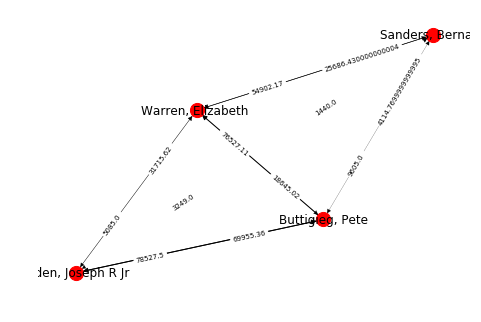

In [16]:
max_contr = max(G[u][v]['weight'] for u,v in G.edges)
weights = [round(G[u][v]['weight']/max_contr, 1) for u,v in G.edges]
pos = nx.spring_layout(G)
nx.draw(G, edges=G.edges, width=weights, pos=pos, node_size=200, with_labels = True)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)

In [12]:
# Try multi.dot (WIP)
write_dot(G,'multi.dot')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [20]:
df.sort_values('contb_receipt_amt', ascending=False)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,...,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,party,in_50_states,contbr_id,month
379980,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,2721782.08,...,X,NaN,SA18,1219890,SA18.1179357,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,2017-12-01
380870,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,2561763.11,...,X,NaN,SA18,1248053,SA18.15581,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,2017-04-01
383773,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,1158174.79,...,X,NaN,SA18,1248053,SA18.15582,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,2017-06-01
965405,C00694455,P00009423,"Harris, Kamala D.",KAMALA HARRIS FOR SENATE - UNITEMIZED,LOS ANGELES,CA,900175864,NaN,NaN,1016308.67,...,X,* TRANSFER OF SENATE CAMPAIGN FUNDS.,SA18,1326016,1554548J,P2020,Democratic,1,KAMALA HARRIS FOR SENATE - UNITEMIZED_900175864,2019-02-01
1011311,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,712803.31,...,X,NaN,SA18,1326465,999768J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293,2019-02-01
382333,C00580100,P80001571,"Trump, Donald J.",TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,BEVERLY,MA,01915,NaN,NaN,271807.73,...,X,NaN,SA18,1219890,SA18.1179359,P2020,Republican,1,TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE - UNI...,2017-12-01
1011274,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,153169.32,...,X,NaN,SA18,1326465,1003894J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293,2019-02-01
938840,C00693713,P00009183,"Gabbard, Tulsi",TULSI FOR HAWAI'I,KAPOLEI,HI,967070561,NaN,NaN,132078.00,...,X,* LIST PURCHASE,SA18,1326558,982744,P2020,Democratic,1,TULSI FOR HAWAI'I_967070561,2019-03-01
895750,C00693234,P00009621,"Warren, Elizabeth","ELIZABETH FOR MA, INC.",BOSTON,MA,021290210,NaN,NaN,105000.00,...,X,* IN-KIND TRANSFER OF CAMPAIGN ASSETS,SA18,1326299,2816314,P2020,Democratic,1,"ELIZABETH FOR MA, INC._021290210",2019-02-01
1011330,C00695510,P00009795,"Booker, Cory A.",CORY BOOKER FOR SENATE - UNITEMIZED,WASHINGTON,DC,200030293,NaN,NaN,35459.41,...,X,NaN,SA18,1326465,1078131J,P2020,Democratic,1,CORY BOOKER FOR SENATE - UNITEMIZED_200030293,2019-03-01
